## Import & Setting

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

In [45]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# EDA

In [3]:
data_path = '/Users/toad/Documents/Hackathon/Predict_EV/data'
data = pd.read_csv(data_path+'/train.csv')

display(data.info())
display(data.describe())
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7497 entries, 0 to 7496
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7497 non-null   object 
 1   제조사       7497 non-null   object 
 2   모델        7497 non-null   object 
 3   차량상태      7497 non-null   object 
 4   배터리용량     4786 non-null   float64
 5   구동방식      7497 non-null   object 
 6   주행거리(km)  7497 non-null   int64  
 7   보증기간(년)   7497 non-null   int64  
 8   사고이력      7497 non-null   object 
 9   연식(년)     7497 non-null   int64  
 10  가격(백만원)   7497 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 644.4+ KB


None

,배터리용량,주행거리(km),보증기간(년),연식(년),가격(백만원)
count,4786.000000,7497.000000,7497.000000,7497.000000,7497.000000
mean,69.397187,44287.979458,4.960918,0.222489,62.331949
std,15.283635,55204.064386,3.155342,0.569232,36.646759
min,46.000000,3.000000,0.000000,0.000000,9.000000
25%,56.359000,5465.000000,2.000000,0.000000,34.390000
50%,68.125000,17331.000000,5.000000,0.000000,56.000000
75%,78.227000,61252.000000,8.000000,0.000000,80.050000
max,99.800000,199827.000000,10.000000,2.000000,161.090000


,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
0,TRAIN_0000,P사,TayGTS,Nearly New,86.077,AWD,13642,0,No,2,159.66
1,TRAIN_0001,K사,Niro,Nearly New,56.000,FWD,10199,6,No,0,28.01
2,TRAIN_0002,A사,eT,Brand New,91.200,AWD,2361,7,No,0,66.27
3,TRAIN_0003,A사,RSeTGT,Nearly New,NaN,AWD,21683,3,No,0,99.16
4,TRAIN_0004,B사,i5,Pre-Owned,61.018,AWD,178205,1,No,0,62.02


In [72]:
print(f'전체 데이터 수 : {len(data)}')
print(f'결측치 개수 : "배터리용량"({data.배터리용량.isnull().sum()}/{len(data)})')


cont_cols = data.select_dtypes(include = ['float64', 'int64']).columns.values
cont_cols = np.delete(cont_cols, [2,3])
cat_cols = data.select_dtypes(include = ['int64', 'object']).columns.values
cat_cols = np.delete(cat_cols, [5])
print('')
print('변수 개수 및 변수 종류')
print(f'- 전체 컬럼 (수:{len(data.columns)}) -> {data.columns.values}')
print(f'- 연속형 컬러 (수:{len(cont_cols)}) -> {cont_cols}')
print(f'- 범주형 컬러 (수:{len(cat_cols)}) -> {cat_cols}')

print('')
print('범주형 변수의 고유값 개수')
for col in cat_cols[1:]:
    print(f'- {col}의 고유값 (수:{len(data[col].unique())}) -> {data[col].unique()}')

전체 데이터 수 : 7497
결측치 개수 : "배터리용량"(2711/7497)

변수 개수 및 변수 종류
- 전체 컬럼 (수:11) -> ['ID' '제조사' '모델' '차량상태' '배터리용량' '구동방식' '주행거리(km)' '보증기간(년)' '사고이력' '연식(년)'
 '가격(백만원)']
- 연속형 컬러 (수:3) -> ['배터리용량' '주행거리(km)' '가격(백만원)']
- 범주형 컬러 (수:8) -> ['ID' '제조사' '모델' '차량상태' '구동방식' '보증기간(년)' '사고이력' '연식(년)']

범주형 변수의 고유값 개수
- 제조사의 고유값 (수:7) -> ['P사' 'K사' 'A사' 'B사' 'H사' 'T사' 'V사']
- 모델의 고유값 (수:21) -> ['TayGTS' 'Niro' 'eT' 'RSeTGT' 'i5' 'ION6' 'MS' 'MY' 'Q4eT' 'ID4' 'TayCT'
 'Soul' 'iX' 'MX' 'IONIQ' 'EV6' 'KNE' 'M3' 'i3' 'ION5' 'Tay']
- 차량상태의 고유값 (수:3) -> ['Nearly New' 'Brand New' 'Pre-Owned']
- 구동방식의 고유값 (수:3) -> ['AWD' 'FWD' 'RWD']
- 보증기간(년)의 고유값 (수:11) -> [ 0  6  7  3  1  5  8 10  2  4  9]
- 사고이력의 고유값 (수:2) -> ['No' 'Yes']
- 연식(년)의 고유값 (수:3) -> [2 0 1]


## Distribution of variables

### Target Variable Distribution

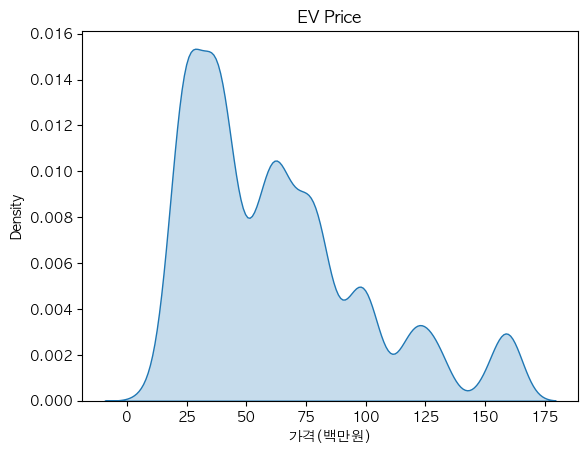

In [21]:
sns.kdeplot(data['가격(백만원)'], cmap = 'Blues', fill = True)
plt.title('EV Price')
plt.show()

### Price distribution per variabels

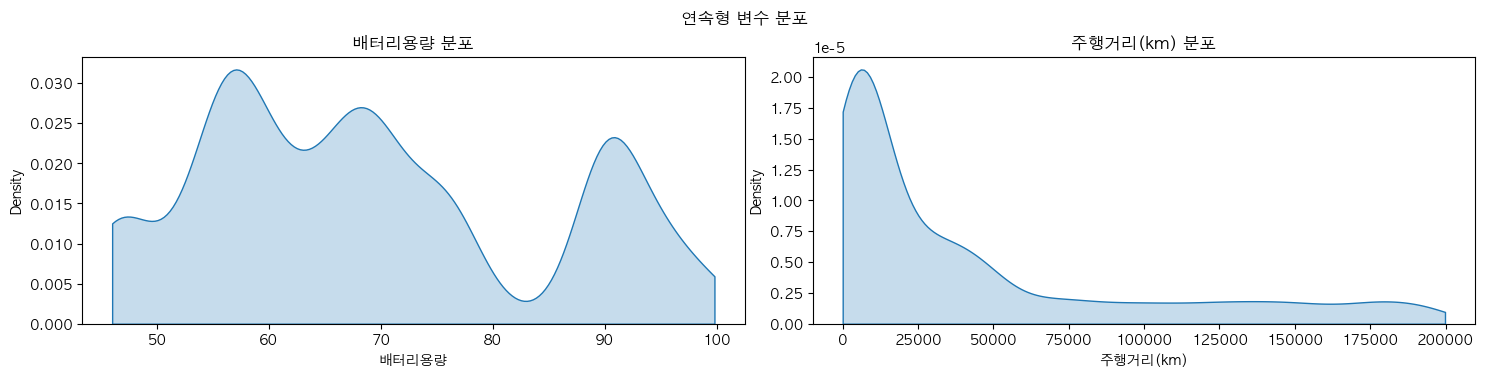

In [79]:
plt.figure(figsize=(15, 10), constrained_layout=True) # 전체 플롯 크기 설정
target = '가격(백만원)'
plt.suptitle('연속형 변수 분포')
for i, feature in enumerate(cont_cols[:2], 1):
    plt.subplot(len(cont_cols), 2, i)
    sns.kdeplot(data[feature], clip=(data[feature].min(), data[feature].max()), cmap="Blues", fill=True)
    plt.title(f'{feature} 분포')
plt.show()

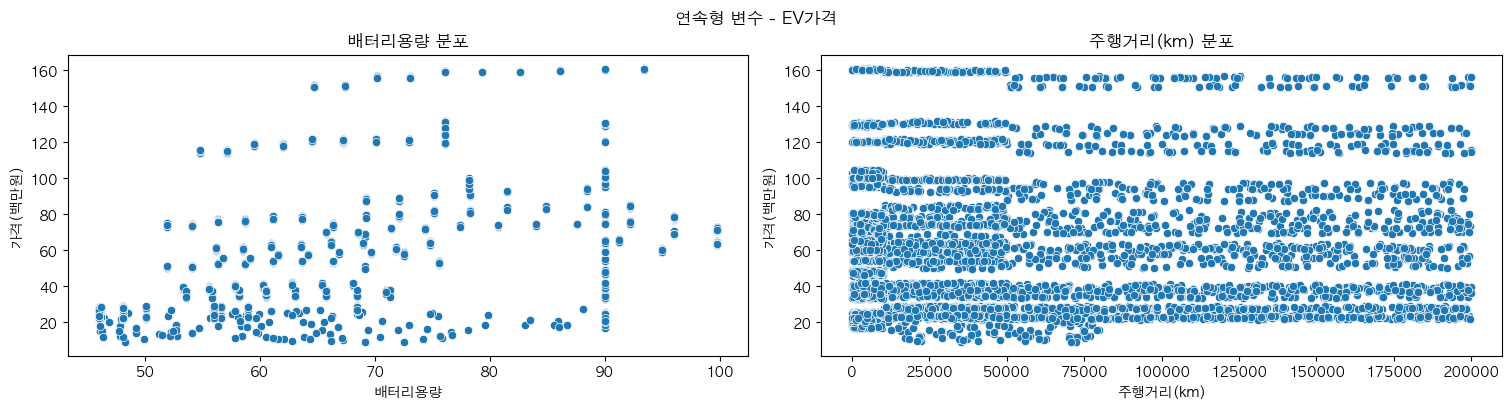

In [101]:
plt.figure(figsize=(15, 10), constrained_layout=True)  # 전체 플롯 크기 설정
target = '가격(백만원)'
plt.suptitle('연속형 변수 - EV가격')
for i, feature in enumerate(cont_cols[:2], 1):
    plt.subplot(len(cont_cols), 2, i)
    sns.scatterplot(data=data, x=feature, y='가격(백만원)')
    plt.title(f'{feature} 분포')
plt.show()

* 배터리 용량의 경우 미세하지만 용량이 클 수록 가격이 높아지는 경향이 있음
* 주행거리와 가격은 상관관계가 전혀 보이지 않음, 주행거리 뿐만 아니라 여러 요인이 가격에 관여하는 것으로 확인

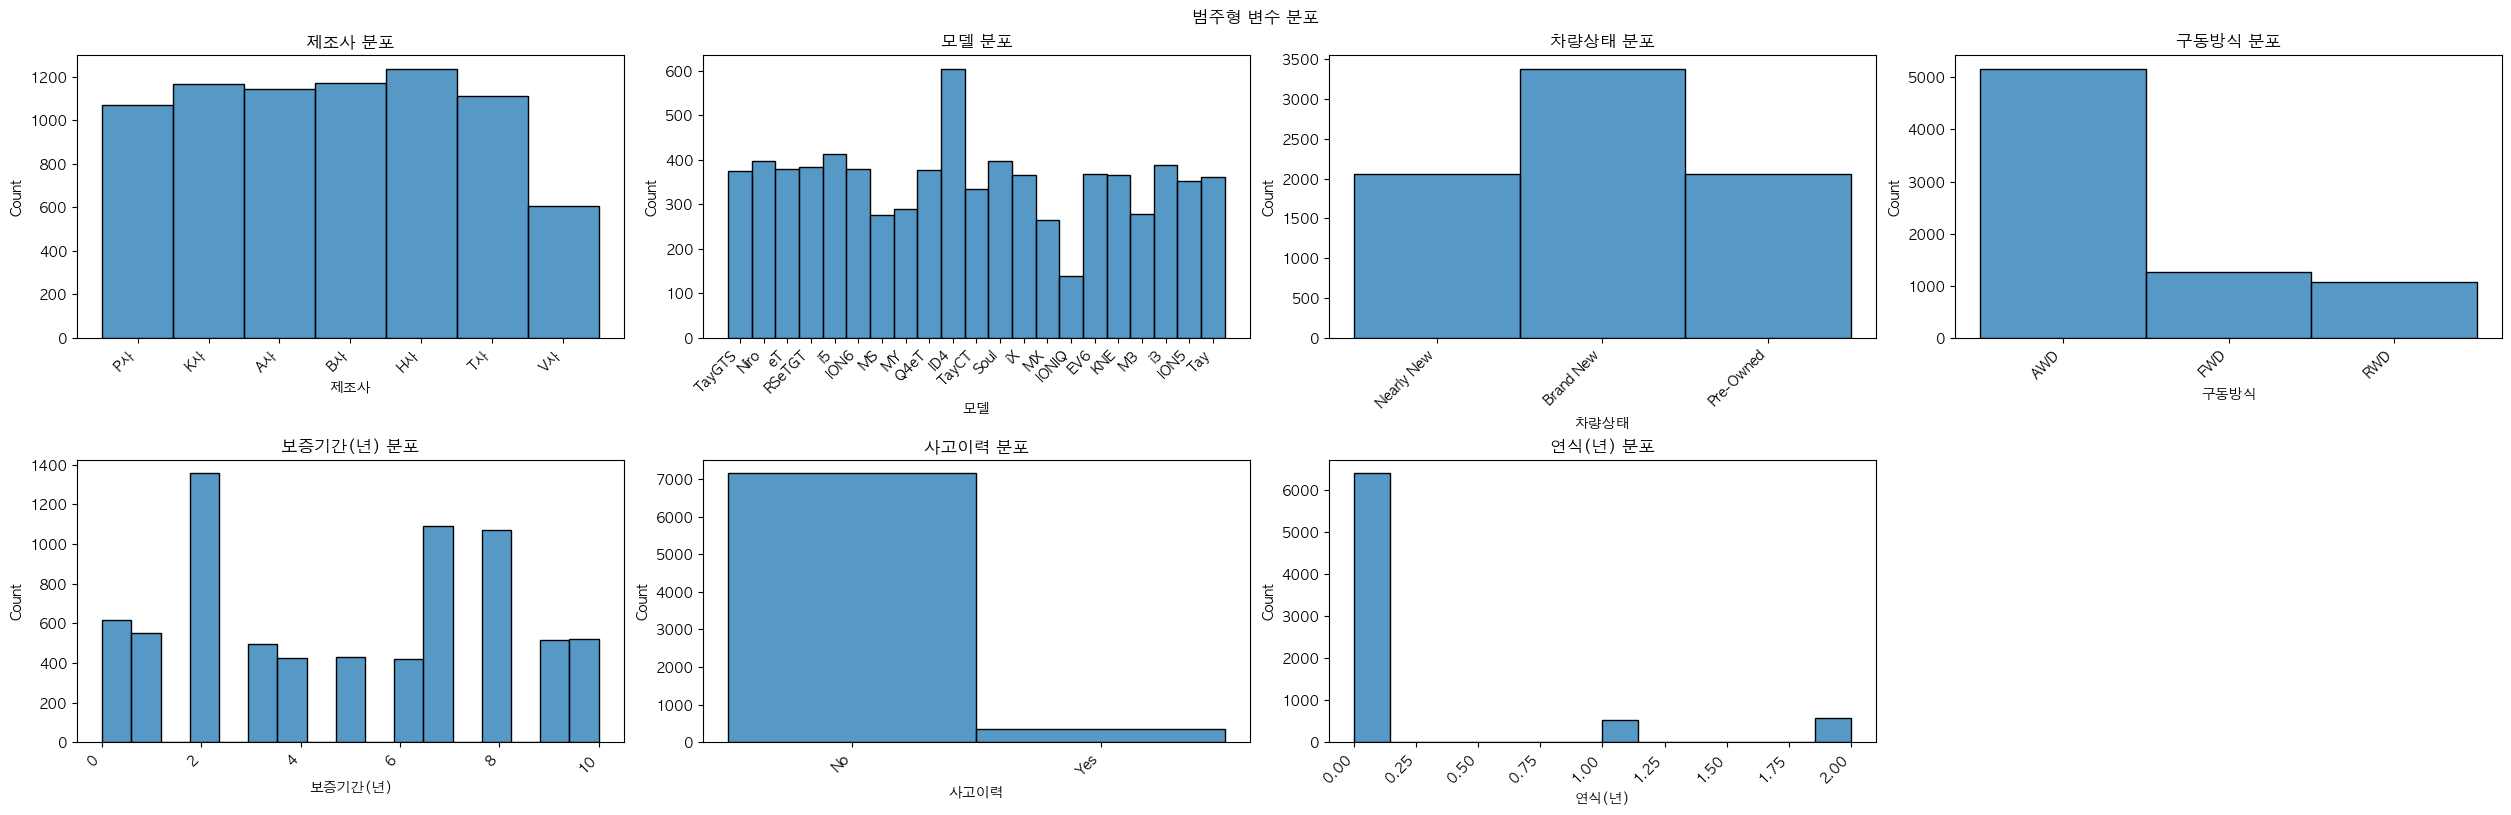

In [98]:
plt.figure(figsize=(25, 25), constrained_layout=True)  # 전체 플롯 크기 설정
target = '가격(백만원)'
plt.suptitle('범주형 변수 분포')
for i, feature in enumerate(cat_cols[1:], 1):
    plt.subplot(len(cat_cols), 4, i)
    sns.histplot(data[feature])
    plt.title(f'{feature} 분포')
    plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

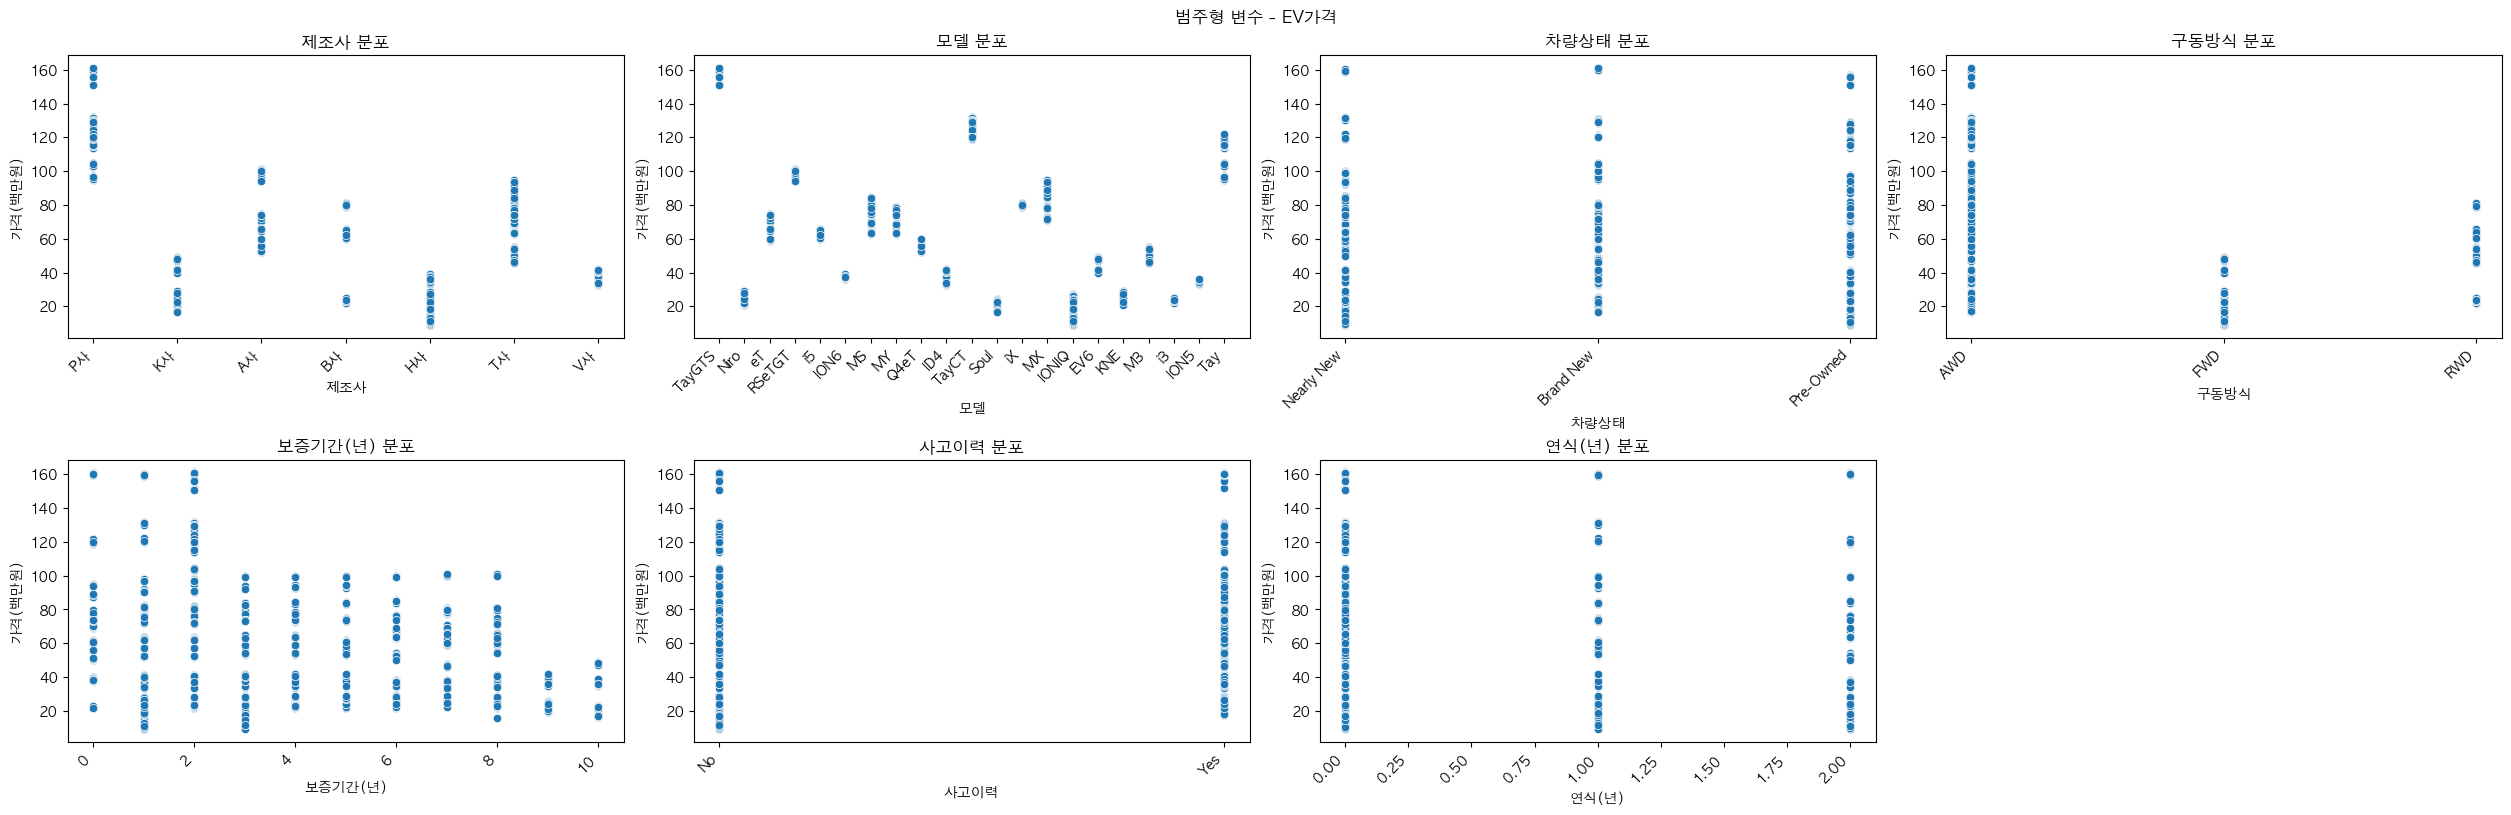

In [105]:
plt.figure(figsize=(25, 25), constrained_layout=True)  # 전체 플롯 크기 설정
target = '가격(백만원)'
plt.suptitle('범주형 변수 - EV가격')
for i, feature in enumerate(cat_cols[1:], 1):
    plt.subplot(len(cat_cols), 4, i)
    sns.scatterplot(data=data, x=feature, y='가격(백만원)')
    plt.title(f'{feature} 분포')
    plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()

- 여러 요인 중 카테고리 별로 가격 차이를 보이는 변수는 [제조사, 모델, 구동방식, 보증기간]인 것으로 확인된다.
- 제조사, 모델의 경우 익히 하는 프리미엄 브랜드들의 EV 가격이 높게 형성 되어있음
- 구동방식의 경우 전륜구동이 가장 많은 데이터 수를 가지고, 전륜 구동이 더 높은 가격을 형성하고 있음
- 보증기간의 경우 0-2년의 보증기간이 더 높은 가격을 보임  
    -> 왜 보증기간이 짧으면 높은 가격을 나타내는가? 잔여 보증기간이 아닌 것인가...  
    -> 그렇다기에는 동일 모델중 (보증 1년, 연식2년), (보증1년, 연식 0년) 과 같은 데이터가 있다.

In [117]:
data[(data['보증기간(년)'].isin([0, 1, 2])) & (data['모델'] == 'IONIQ')]

,ID,제조사,모델,차량상태,배터리용량,구동방식,주행거리(km),보증기간(년),사고이력,연식(년),가격(백만원)
101,TRAIN_0101,H사,IONIQ,Pre-Owned,52.78,FWD,76769,1,No,2,12.63
154,TRAIN_0154,H사,IONIQ,Pre-Owned,NaN,FWD,63940,1,No,0,26.81
180,TRAIN_0180,H사,IONIQ,Pre-Owned,75.64,FWD,22186,1,No,0,12.20
190,TRAIN_0190,H사,IONIQ,Pre-Owned,52.06,FWD,67838,1,No,2,23.40
254,TRAIN_0254,H사,IONIQ,Pre-Owned,NaN,FWD,22289,1,No,0,9.77
...,...,...,...,...,...,...,...,...,...,...,...
7278,TRAIN_7278,H사,IONIQ,Pre-Owned,76.74,FWD,55828,1,No,1,12.90
7312,TRAIN_7312,H사,IONIQ,Pre-Owned,46.09,FWD,44351,1,No,0,17.83
7372,TRAIN_7372,H사,IONIQ,Pre-Owned,56.41,FWD,33959,1,No,2,18.06
7379,TRAIN_7379,H사,IONIQ,Pre-Owned,49.97,FWD,60272,1,No,2,10.85
